In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
cat4 = cv2.imread("CATS_DOGS/train/CAT/4.jpg")

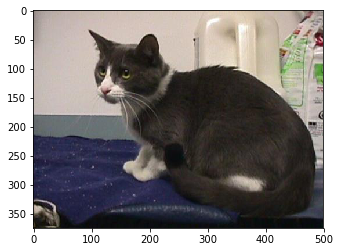

In [3]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [4]:
cat4.shape

(375, 500, 3)

In [5]:
dog = cv2.imread("CATS_DOGS/train/DOG/2.jpg")

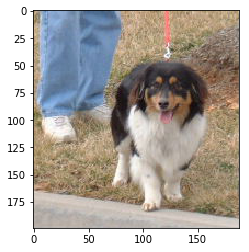

In [8]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [9]:
dog.shape

(199, 188, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator( rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip = True,
                              fill_mode="nearest")

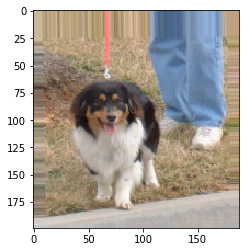

In [24]:
plt.imshow(image_gen.random_transform(dog))

In [34]:
image_gen.flow_from_directory("CATS_DOGS/train/")
input_shape = (150,150,3)
input_shape[:2]

Found 18743 images belonging to 2 classes.


(150, 150)

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [31]:
model = Sequential()

In [32]:
model.add( Conv2D(filters=32 , kernel_size=(3,3), input_shape=(150,150,3) , activation="relu"  ))
model.add( MaxPooling2D( pool_size=(2,2 ) )  )

model.add( Conv2D(filters=64 , kernel_size=(3,3), input_shape=(150,150,3) , activation="relu"  ))
model.add( MaxPooling2D( pool_size=(2,2 ) )  )

model.add( Conv2D(filters=64 , kernel_size=(3,3), input_shape=(150,150,3) , activation="relu"  ))
model.add( MaxPooling2D( pool_size=(2,2 )))

model.add( Flatten() )

model.add( Dense(128) )
model.add( Activation("relu"))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile( loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [35]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory("CATS_DOGS/train",target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode="binary")

Found 18743 images belonging to 2 classes.


In [36]:
test_image_gen = image_gen.flow_from_directory("CATS_DOGS/test",target_size=input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode="binary")

Found 6251 images belonging to 2 classes.


In [37]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [38]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                             validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
150/150 [==============================] - 151s 1s/step - loss: 0.6993 - acc: 0.5180 - val_loss: 0.6930 - val_acc: 0.5001


In [39]:
results.history["acc"]

[0.51777498961891]

In [40]:
from keras.models import load_model

In [42]:
new_model = load_model("DATA/cat_dog_100epochs.h5")

In [53]:
dog_file ="CATS_DOGS/test/DOG/10005.jpg"

In [54]:
from keras.preprocessing import image

In [58]:
dog_img = image.load_img(dog_file, target_size=(150,150))
dog_img = image.img_to_array(dog_img)

In [59]:
dog_img.shape

(150, 150, 3)

In [60]:
import numpy as np
dog_img = dog_img.reshape(1,150,150,3)

In [61]:
dog_img.shape

(1, 150, 150, 3)

In [62]:
dog_img = dog_img/255

In [63]:
model.predict_classes(dog_img)

array([[0]])

In [64]:
model.predict(dog_img)

array([[0.47535485]], dtype=float32)